<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)





\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [ ]:
#exponencial 
import numpy as np
import math
#np.factorial
def funcionexpo(x, N):
    e = 0
    for i in range(N):
        sumatoria = (-1)**i * (x**i) / math.factorial(i)
        e += sumatoria
    return e


In [ ]:
funcionexpo(10,1000)

4.5399929433607724e-05

In [ ]:
#funcion exponencial con la condicion de el error de e^-x
def funcionexpo2(x, N):
    e = 0
    i = 0
    diferencia = 1
    while i <= N and diferencia > 0.000001:
        termino = (-1)**i * (x**i) / math.factorial(i)
        e += termino
        if i > 0:
           diferencia = abs(termino - anterior)
        anterior = termino
        i += 1
    return e, diferencia

In [ ]:
funcionexpo2(10,1000)

(4.5439110291729325e-05, 9.177423384193353e-07)

In [ ]:
#funcion exponencial expresada como 1/e^x

In [ ]:
def funcionexpo3(x, N):
    e = 0
    for i in range(N):
        sumatoria = (x**i)/math.factorial(i)
        e += sumatoria
    return e

In [ ]:
funcionexpo3(10,10)

10086.573192239859

x=0.1: exact=0.90483742, series=1.90483742
x=0.5: exact=0.60653066, series=1.60653066
x=1.0: exact=0.36787944, series=1.36787944
x=10: exact=0.00004540, series=1.00004539
n=7, term=-1984.12698413
n=8, term=2480.15873016
n=9, term=-2755.73192240
n=10, term=2755.73192240
n=11, term=-2505.21083854
n=12, term=2087.67569879
x=100: exact=0.00000000, series=0.00000000
x=1000: exact=0.00000000, series=0.00000000
x=10000: exact=0.00000000, series=0.00000000
Series diverges at x=1


<ipython-input-20-edaf19d5de0e>:31: RuntimeWarning: overflow encountered in exp
  series = 1 / np.exp(x)


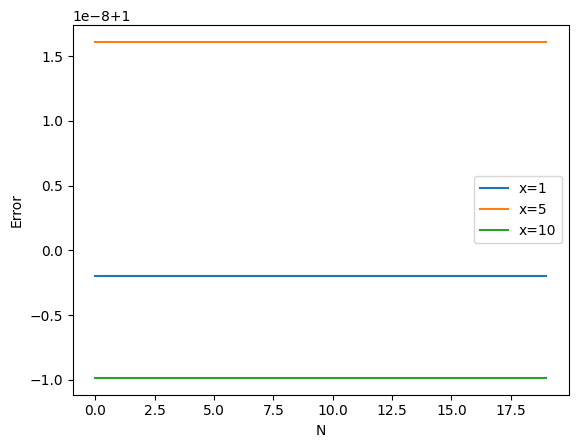

In [ ]:
import numpy as np

def exp_neg_x(x):
    sum = 1.0
    term = 1.0
    n = 0
    while np.abs(term) > 1e-7 * np.abs(sum):
        term = (-1)**n * x**n / np.math.factorial(n)
        sum += term
        n += 1
    return sum

# Test for x <= 1
for x in [0.1, 0.5, 1.0]:
    exact = np.exp(-x)
    series = exp_neg_x(x)
    print(f"x={x:.1f}: exact={exact:.8f}, series={series:.8f}")

# Test for x = 10
x = 10
exact = np.exp(-x)
series = exp_neg_x(x)
print(f"x={x}: exact={exact:.8f}, series={series:.8f}")
for n in range(7, 13):
    term = (-1)**n * x**n / np.math.factorial(n)
    print(f"n={n}, term={term:.8f}")

# Test for large x
for x in [100, 1000, 10000]:
    exact = np.exp(-x)
    series = 1 / np.exp(x)
    print(f"x={x}: exact={exact:.8f}, series={series:.8f}")

# Find the range of x where the series is accurate and converges
for x in range(1, 101):
    series = exp_neg_x(x)
    if np.abs(series - np.exp(-x)) > 1e-7:
        print(f"Series diverges at x={x}")
        break
    elif np.abs(series - np.exp(-x)) > 1e-10:
        print(f"Series loses accuracy at x={x}")

# Plot the error versus N for different values of x
import matplotlib.pyplot as plt

x_values = [1, 5, 10]
for x in x_values:
    exact = np.exp(-x)
    errors = []
    for n in range(20):
        series = exp_neg_x(x)
        error = np.abs(series - exact)
        errors.append(error)
    plt.plot(errors, label=f"x={x}")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.show()



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)



In [ ]:

def s1(N):
  serie=0
  for n in range(1,2*N+1):
    suma = (-1)**n * (n/(n+1))
    serie += suma
  return serie

s1(1000)

0.3066030068151212

In [ ]:
def s2(N):
  serie=0
  for n in range(1, N+1):
    suma1= (2*n-1)/(2*n)
    suma2= (2*n)/(2*n + 1)
    serie += suma2-suma1
  return serie

s2(1000)

0.3066030068151212

In [ ]:
def s3(N):
  serie =0
  for n in range(1, N+1):
    suma = 1/(2*n*(2*n+1))
    serie +=suma
  return serie

s3(1000)

0.30660300681512476

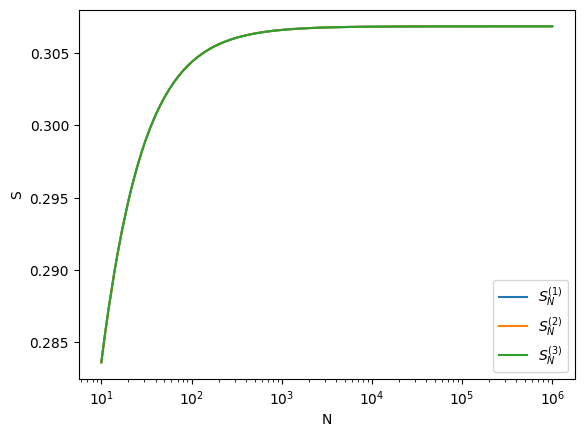

In [ ]:
import matplotlib.pyplot as plt

N_values = np.logspace(1, 6, 100, dtype=int)

s1_values = np.zeros_like(N_values, dtype=float)
s2_values = np.zeros_like(N_values, dtype=float)
s3_values = np.zeros_like(N_values, dtype=float)

for i, N in enumerate(N_values):
    s1_values[i] = s1(N)
    s2_values[i] = s2(N)
    s3_values[i] = s3(N)

plt.plot(N_values, s1_values, label=r'$S_N^{(1)}$')
plt.plot(N_values, s2_values, label=r'$S_N^{(2)}$')
plt.plot(N_values, s3_values, label=r'$S_N^{(3)}$')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('S')
plt.legend()
plt.show()


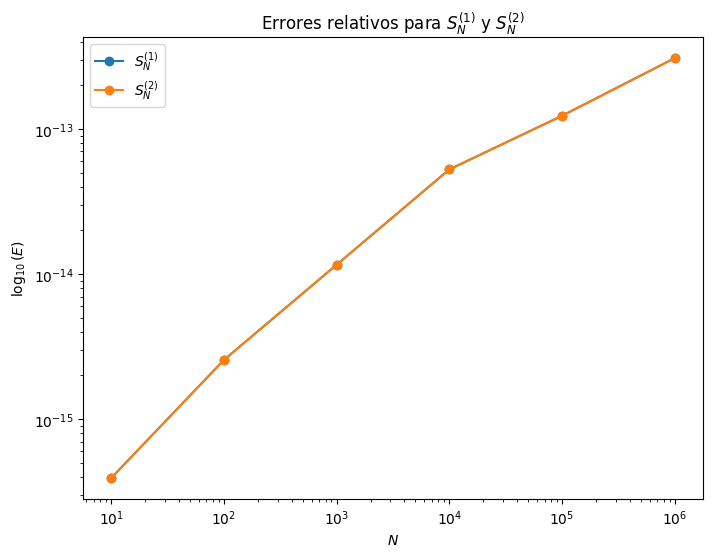

In [27]:
# Calcular las sumas para diferentes valores de N
N_values = np.logspace(1, 6, 6, dtype=int)
s1_values = np.zeros_like(N_values, dtype=float)
s2_values = np.zeros_like(N_values, dtype=float)
s3_values = np.zeros_like(N_values, dtype=float)

for i, N in enumerate(N_values):
    s1_values[i] = s1(N)
    s2_values[i] = s2(N)
    s3_values[i] = s3(N)

# Graficar las sumas en función de N
plt.figure(figsize=(8, 6))
plt.loglog(N_values, np.abs(s1_values - s3_values)/s3_values, 'o-', label=r'$S_N^{(1)}$')
plt.loglog(N_values, np.abs(s2_values - s3_values)/s3_values, 'o-', label=r'$S_N^{(2)}$')
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$\log_{10}(E)$')
plt.title('Errores relativos para $S_N^{(1)}$ y $S_N^{(2)}$')
plt.show()


